In [3]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


Saving employee_attrition.csv to employee_attrition.csv


In [4]:
# Step 1: Data Understanding
df = pd.read_csv("employee_attrition.csv")

print("First 5 rows:\n", df.head())
print("\nDataset Info:\n")
print(df.info())
print("\nDescription:\n", df.describe(include="all"))

# Check missing values
print("\nMissing values:\n", df.isnull().sum())

First 5 rows:
    Age Department  Years_At_Company  Salary Overtime  JobSatisfaction  \
0   29      Sales                12      38       No                3   
1   23    Finance                12      98       No                1   
2   39       Tech                19      46       No                1   
3   37    Finance                14      46       No                5   
4   36       Tech                16      90       No                4   

  Attrition  
0        No  
1       Yes  
2        No  
3       Yes  
4       Yes  

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               50 non-null     int64 
 1   Department        50 non-null     object
 2   Years_At_Company  50 non-null     int64 
 3   Salary            50 non-null     int64 
 4   Overtime          50 non-null     object
 5   JobSatisfaction  

In [5]:
# Step 2: Data Preprocessing
# Encode categorical variables
df_encoded = df.copy()
df_encoded["Department"] = df_encoded["Department"].astype("category").cat.codes
df_encoded["Overtime"] = df_encoded["Overtime"].map({"Yes": 1, "No": 0})

# Features and Target
X = df_encoded.drop("Attrition", axis=1)   # Assuming 'Attrition' is the target column
y = df_encoded["Attrition"].map({"Yes": 1, "No": 0})  # Convert target to numeric

# Train-test split (70-30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [6]:
# Step 3: Model Building
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

print("\n Model trained successfully")
print("Number of Trees:", len(clf.estimators_))
print("Number of Features:", clf.n_features_in_)


 Model trained successfully
Number of Trees: 100
Number of Features: 6


In [7]:
# Step 3: Model Building
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

print("\n Model trained successfully")
print("Number of Trees:", len(clf.estimators_))
print("Number of Features:", clf.n_features_in_)

# Step 4: Model Evaluation
y_pred = clf.predict(X_test)

print("\n Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


 Model trained successfully
Number of Trees: 100
Number of Features: 6

 Accuracy: 0.4666666666666667

Confusion Matrix:
 [[5 2]
 [6 2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.71      0.56         7
           1       0.50      0.25      0.33         8

    accuracy                           0.47        15
   macro avg       0.48      0.48      0.44        15
weighted avg       0.48      0.47      0.44        15



In [8]:
# Step 5: Model Tuning (example with different parameters)
clf_tuned = RandomForestClassifier(
    n_estimators=200, max_depth=10, criterion="entropy", random_state=42
)
clf_tuned.fit(X_train, y_train)
y_pred_tuned = clf_tuned.predict(X_test)

print("\n Tuned Model Accuracy:", accuracy_score(y_test, y_pred_tuned))


 Tuned Model Accuracy: 0.4666666666666667



 Feature Importances:
 Salary              0.313627
Age                 0.233029
Years_At_Company    0.180854
JobSatisfaction     0.129833
Department          0.112483
Overtime            0.030173
dtype: float64


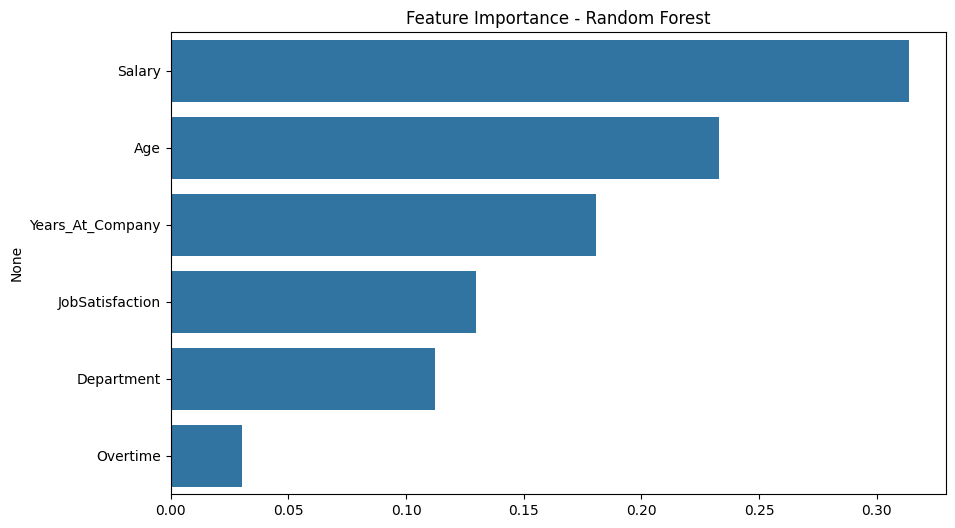

In [9]:
# Step 6: Feature Importance
importances = pd.Series(clf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

print("\n Feature Importances:\n", importances)

plt.figure(figsize=(10,6))
sns.barplot(x=importances.values, y=importances.index)
plt.title("Feature Importance - Random Forest")
plt.show()